In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')

df.head()

C:\Users\osegh\AppData\Local\Temp\ipykernel_23232\3606275901.py:1: DtypeWarning: Columns (1,4,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')


,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,No,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


In [3]:
df.columns

Index(['Unnamed: 0', 'BIRTHSEX', 'MENTHLTH', 'POORHLTH', 'ADDEPEV3', 'DECIDE',
       'DIFFALON', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC',
       'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',
       'IYEAR'],
      dtype='object')

In [4]:
#seperated by yes and no / Never, Once, More than once 
ace_YN = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC']

ace_NOM = ['ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',]


So for this variable 'ACEDIVRC' it is asking 'Were your parents separated or divorced?' The answer are yes, no, Don't know/Not sure, Parents not married, refused. I dropped Don't know/Not sure and refused but I don't want to drop parents not married.

In [5]:
for col in ace_YN:
    print(col, df[col].unique())

ACEDEPRS ['No' nan 'Yes']
ACEDRINK ['No' 'Yes' nan]
ACEDRUGS ['No' nan 'Yes']
ACEPRISN ['No' nan 'Yes']
ACEDIVRC ['Yes' 'No' nan 'Parents not married']


In [6]:
for col in ace_NOM:
    print(col, df[col].unique())

ACEPUNCH ['Never' nan 'More than once' 'Once']
ACEHURT1 ['More than once' 'Once' 'Never' nan]
ACESWEAR ['Never' 'More than once' nan 'Once']
ACETOUCH ['Never' nan 'Once' 'More than once']
ACETTHEM ['Never' nan 'Once' 'More than once']
ACEHVSEX ['Never' nan 'More than once' 'Once']


So I will have to use a Hierarchical Agglomerative Clustering because I have a mix data categories/ Tree

# Gower Distance (mixed variable types)

In [9]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [10]:
df.head()

,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,No,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


In [11]:
df_clean = df.dropna(subset=ace_NOM + ace_YN)
df_clean

,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019
6,6,NaN,0.0,0.0,No,No,Yes,No,No,No,No,No,Never,Never,More than once,Never,Never,Never,2019
7,7,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Once,Never,Never,Never,Never,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233908,376947,NaN,6.0,28.0,1.0,Yes,Yes,Yes,No,No,No,No,Never,Never,Once,Once,Once,Never,2023
1233909,376948,NaN,7.0,NaN,0.0,No,Yes,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2023
1233910,376949,NaN,0.0,NaN,0.0,No,No,No,No,No,No,Yes,Never,Never,Never,Never,Never,Never,2023
1233911,376950,NaN,1.0,0.0,0.0,No,No,No,No,No,No,No,Never,Never,More than once,Never,Never,Never,2023


In [12]:
num_cols = []
cat_cols = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC',
       'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

cat_cols

['ACEDEPRS',
 'ACEDRINK',
 'ACEDRUGS',
 'ACEPRISN',
 'ACEDIVRC',
 'ACEPUNCH',
 'ACEHURT1',
 'ACESWEAR',
 'ACETOUCH',
 'ACETTHEM',
 'ACEHVSEX']

In [17]:
def gower_distance(df_clean, cat_cols):
    X = df_clean[cat_cols].to_numpy() 
    
    n = X.shape[0]
    num_cols = len(cat_cols) 
    
    D = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(i + 1, n):
            matches = (X[i] == X[j])
            
            diff_count = np.sum(~matches) 
            
            d = diff_count / num_cols
            
            D[i, j] = D[j, i] = d
            
    return D

Due to memory constraints (full 201,597² pairwise distances ≈ 300 GB), we compute Gower distances on a random subsample of 5,000 observations


kd-tree 


In [18]:
df_sample = df_clean.sample(n=2000, random_state=42)
distance_matrix = gower_distance(df_sample, cat_cols)
print(distance_matrix.shape)

(2000, 2000)


C:\Users\osegh\AppData\Local\Temp\ipykernel_23232\1844489291.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='complete')


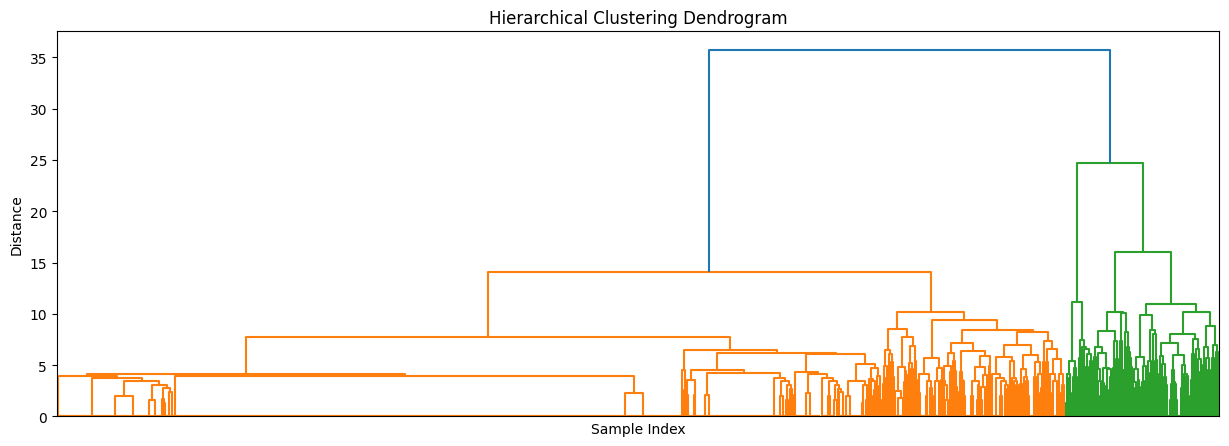

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(distance_matrix, method='complete')

plt.figure(figsize=(15, 5))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()